# Using Python Pandas with NBA Data

**Abstract**

Pandasの基本的なコマンドを実行し、NBAのサンプルデータを分析します。
サンプルデータはPandasで読み込めるカンマ区切りのCSVファイルです。

# 1 Python: Data Manipulation

このドキュメントでは、Python環境でPandasを使ってデータを分析する方法を検討します。

Pandasのデータフレーム（DataFrame）を使ってCSVファイルを扱い、他のPythonパッケージでさらに処理できるよう、簡単な計算や加工をします。


ここでは、2016年3月12日　オクラホマシティ・サンダー vs サントニオ・スパーズの試合データを使います。

In [32]:
"""
# チュートリアルには[2016-03-12]-0021500979-OKC@SAS.csv　とあったが、
# CSVファイルが入手できなかったので、2016年6月10日の GSW vs CLE 戦のデータを使う
#
""" 

file = '(2016-06-10)-0041500404-GSW@CLE.csv'

# 2 Pandas

Pandasをインポートします。<br/>
もしPandaがインストールされていない場合は、「pip install pandas」を実行しましょう。

In [3]:
 import pandas as pd

## 2.1 Reading In Files and Accessing Data

CSVファイルを読み込みます

In [14]:
game = pd.read_csv(file)

データの形式（行数・列数）をチェックします

In [17]:
game.shape

(467, 44)

どのような項目のデータが格納されているのでしょうか。<br/>
列名を表示します

In [19]:
game.columns.values

array(['game_id', 'data_set', 'date', 'a1', 'a2', 'a3', 'a4', 'a5', 'h1',
       'h2', 'h3', 'h4', 'h5', 'period', 'away_score', 'home_score',
       'remaining_time', 'elapsed', 'play_length', 'play_id', 'team',
       'event_type', 'assist', 'away', 'home', 'block', 'entered', 'left',
       'num', 'opponent', 'outof', 'player', 'points', 'possession',
       'reason', 'result', 'steal', 'type', 'shot_distance', 'original_x',
       'original_y', 'converted_x', 'converted_y', 'explanation'],
      dtype=object)

columnsとそのサブ属性valuesを使うことで、列名の配列を参照できました。

次にheadやtailコマンドを使ってみましょう。

In [21]:
game.head(5)

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,explanation
0,41500404,2016 Playoff,6/10/16,Harrison Barnes,Draymond Green,Andrew Bogut,Klay Thompson,Stephen Curry,Richard Jefferson,LeBron James,...,NaN,NaN,NaN,start of period,NaN,NaN,NaN,NaN,NaN,NaN
1,41500404,2016 Playoff,6/10/16,Harrison Barnes,Draymond Green,Andrew Bogut,Klay Thompson,Stephen Curry,Richard Jefferson,LeBron James,...,NaN,NaN,NaN,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Thompson vs. Bogut: Tip to Curry
2,41500404,2016 Playoff,6/10/16,Harrison Barnes,Draymond Green,Andrew Bogut,Klay Thompson,Stephen Curry,Richard Jefferson,LeBron James,...,NaN,missed,NaN,Jump Shot,25.0,-4.0,247.0,25.4,29.7,MISS Green 25' 3PT Jump Shot
3,41500404,2016 Playoff,6/10/16,Harrison Barnes,Draymond Green,Andrew Bogut,Klay Thompson,Stephen Curry,Richard Jefferson,LeBron James,...,NaN,NaN,NaN,rebound offensive,NaN,NaN,NaN,NaN,NaN,Barnes REBOUND (Off:1 Def:0)
4,41500404,2016 Playoff,6/10/16,Harrison Barnes,Draymond Green,Andrew Bogut,Klay Thompson,Stephen Curry,Richard Jefferson,LeBron James,...,NaN,made,NaN,Jump Shot,23.0,225.0,-6.0,2.5,4.4,Barnes 3PT Jump Shot (3 PTS) (Curry 1 AST)


In [22]:
game.tail(5)

,game_id,data_set,date,a1,a2,a3,a4,a5,h1,h2,...,reason,result,steal,type,shot_distance,original_x,original_y,converted_x,converted_y,explanation
462,41500404,2016 Playoff,6/10/16,Klay Thompson,Andre Iguodala,Draymond Green,Shaun Livingston,Stephen Curry,LeBron James,J.R. Smith,...,p.foul,NaN,NaN,p.foul,NaN,NaN,NaN,NaN,NaN,Jefferson P.FOUL (P6.PN) (J.Phillips)
463,41500404,2016 Playoff,6/10/16,Klay Thompson,Andre Iguodala,Draymond Green,Shaun Livingston,Stephen Curry,LeBron James,J.R. Smith,...,NaN,NaN,NaN,sub,NaN,NaN,NaN,NaN,NaN,SUB: Jones FOR Jefferson
464,41500404,2016 Playoff,6/10/16,Klay Thompson,Andre Iguodala,Draymond Green,Shaun Livingston,Stephen Curry,LeBron James,J.R. Smith,...,NaN,made,NaN,Free Throw 1 of 2,NaN,NaN,NaN,NaN,NaN,Curry Free Throw 1 of 2 (37 PTS)
465,41500404,2016 Playoff,6/10/16,Klay Thompson,Andre Iguodala,Draymond Green,Shaun Livingston,Stephen Curry,LeBron James,J.R. Smith,...,NaN,made,NaN,Free Throw 2 of 2,NaN,NaN,NaN,NaN,NaN,Curry Free Throw 2 of 2 (38 PTS)
466,41500404,2016 Playoff,6/10/16,Klay Thompson,Andre Iguodala,Draymond Green,Shaun Livingston,Stephen Curry,LeBron James,J.R. Smith,...,NaN,NaN,NaN,end of period,NaN,NaN,NaN,NaN,NaN,NaN


もし特定の列のデータを参照したい場合は、列名を指定します。

away_score（相手チームの得点のこと？）を見てみましょう

In [9]:
game['away_score']

0        0
1        0
2        0
3        0
4        3
5        3
6        3
7        4
8        5
9        5
10       7
11       7
12       7
13       7
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
      ... 
437     98
438     98
439     98
440     98
441     98
442     98
443     98
444     98
445     98
446     99
447     99
448    100
449    100
450    100
451    101
452    102
453    102
454    102
455    103
456    104
457    104
458    104
459    105
460    106
461    106
462    106
463    106
464    107
465    108
466    108
Name: away_score, Length: 467, dtype: int64

通常配列を扱うのと同じように、簡単に参照できます。

In [23]:
awayScore = game ['away_score']
awayScore[10]

7

行データにアクセスするにはlocコマンドを使います。

もしこのゲームでの11番目のアクションが何か知りたい場合は、10を指定します。<br/>
（インデックスは0から始まる）

In [11]:
game.loc[10]

game_id                                      41500404
data_set                                 2016 Playoff
date                                          6/10/16
a1                                    Harrison Barnes
a2                                     Draymond Green
a3                                       Andrew Bogut
a4                                      Klay Thompson
a5                                      Stephen Curry
h1                                  Richard Jefferson
h2                                       LeBron James
h3                                   Tristan Thompson
h4                                         J.R. Smith
h5                                       Kyrie Irving
period                                              1
away_score                                          7
home_score                                          6
remaining_time                                0:10:27
elapsed                                       0:01:33
play_length                 

このゲームの11番目のアクションは、「Harrison Barnes」選手による「Pullup Jump Shot」のようです。

列名を指定することで行の要素を参照することができます。<br/>
アウェイチームの first playerを見てみましょう。

In [27]:
game.loc[10]['a1']

'Harrison Barnes'

## 2.2 Querying Data in a Dataframe

行と列からデータを抽出する方法を知ったので、次にデータへの問い合わせをします。

例えば、先ほど参照した「Harrison Barnes」のアクション数を数えます。

DataFrameを操作し、複数の行・列に対して「Harrison Barnes」の出現回数を数えるだけです。

In [31]:
count = 0
labels = list(game.columns.values)
for i in range(game.shape[0]): # gameの行数分ループ
    for label in labels:       # gameの列数分ループ
        if 'Harrison Barnes' in str(game.loc[i][label]):
            count = count + 1
            break
            
count

354

「Harrison Barnes」がプレーしていないのに、アクションが発生しているデータがあります。<br/>
（「a1～h5」に名前がないのに、「left」に名前がある）

これは、途中交代で下がったケースですので、除きましょう。

In [18]:
count = 0
labels = list(game.columns.values)
for i in range(game.shape[0]):
    for label in labels:
        if 'Harrison Barnes' in str(game.loc[i]['a1':'h5']):
            count = count + 1
            #print(label)
            break
            
count

349

a1～h5には、コート上の10人のプレーヤー名が記載されています。

「Counter」という機能を使って、コート上の全プレーヤーのアクション数を数えます。

In [19]:
from collections import Counter
totals = Counter(list(game.loc[0, 'a1':'h5']))
totals

Counter({'Harrison Barnes': 1,
         'Draymond Green': 1,
         'Andrew Bogut': 1,
         'Klay Thompson': 1,
         'Stephen Curry': 1,
         'Richard Jefferson': 1,
         'LeBron James': 1,
         'Tristan Thompson': 1,
         'J.R. Smith': 1,
         'Kyrie Irving': 1})

試合開始1つのアクション（0行目）から、先発の10人の名前を抽出できました。

同じように、全プレーヤーのアクション数を数えます。

In [20]:
for i in range(1, game.shape[0]):
    totals = totals + Counter(list(game.loc[i, 'a1':'h5']))
totals 

Counter({'Harrison Barnes': 349,
         'Draymond Green': 406,
         'Andrew Bogut': 75,
         'Klay Thompson': 383,
         'Stephen Curry': 399,
         'Richard Jefferson': 243,
         'LeBron James': 439,
         'Tristan Thompson': 259,
         'J.R. Smith': 417,
         'Kyrie Irving': 417,
         'Andre Iguodala': 374,
         'Kevin Love': 237,
         'Shaun Livingston': 196,
         'Iman Shumpert': 151,
         'James Michael McAdoo': 71,
         'Matthew Dellavedova': 55,
         'Channing Frye': 113,
         'Festus Ezeli': 29,
         'Anderson Varejao': 45,
         'Marreese Speights': 8,
         'Dahntay Jones': 4})

## 2.3 Grouping

Pandasのgroupbyを使って、より洗練されたグルーピングの方法を試しましょう。

groupbyは辞書データ（キーと値を持つ配列）を生成します。

基本的な例として、5対5のマッチアップの組み合わせを見てみましょう。

In [34]:
onCourt = game.groupby(['a1','a2','a3','a4','a5','h1','h2','h3','h4','h5'])
onCourt.groups

{('Draymond Green',
  'Klay Thompson',
  'Andre Iguodala',
  'Shaun Livingston',
  'Stephen Curry',
  'LeBron James',
  'Iman Shumpert',
  'Matthew Dellavedova',
  'Channing Frye',
  'Richard Jefferson'): Int64Index([135], dtype='int64'),
 ('Draymond Green',
  'Klay Thompson',
  'Andre Iguodala',
  'Stephen Curry',
  'Festus Ezeli',
  'LeBron James',
  'Richard Jefferson',
  'Kyrie Irving',
  'J.R. Smith',
  'Tristan Thompson'): Int64Index([162, 163, 164, 165, 166, 167, 168, 169, 170, 171], dtype='int64'),
 ('Draymond Green',
  'Klay Thompson',
  'Andre Iguodala',
  'Stephen Curry',
  'James Michael McAdoo',
  'LeBron James',
  'Channing Frye',
  'Richard Jefferson',
  'Kyrie Irving',
  'J.R. Smith'): Int64Index([149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160], dtype='int64'),
 ('Draymond Green',
  'Klay Thompson',
  'Andre Iguodala',
  'Stephen Curry',
  'James Michael McAdoo',
  'LeBron James',
  'Iman Shumpert',
  'Channing Frye',
  'Richard Jefferson',
  'Kyrie Irving')

最初の組み合わせは、

'Draymond Green', 'Klay Thompson', 'Andre Iguodala', 'Shaun Livingston', 'Stephen Curry', <br/>
'LeBron James', 'Iman Shumpert', 'Matthew Dellavedova', 'Channing Frye', 'Richard Jefferson' <br/>

であり、この組み合わせは135番目のみで発生しています。

Pythonの辞書データはキー項目をソートしません。<br/>
そのため、並び順が違う同じ組み合わせを数えてしまっているかも。

a1～h5を a1～a5に変更し、a1～a5の組み合わせの出現回数を数えてみよう。<br/>
（任意のホームプレーヤーを指定することで、件数を数えられる。ここでは「h4」とした）

In [39]:
onCourt = game.groupby(['a1','a2','a3','a4','a5'])
onCourt['h4'].count()

a1               a2              a3                 a4                    a5                  
Draymond Green   Klay Thompson   Andre Iguodala     Shaun Livingston      Stephen Curry            1
                                                    Stephen Curry         Festus Ezeli            10
                                                                          James Michael McAdoo    26
                                 Stephen Curry      Andre Iguodala        Anderson Varejao         1
                 Stephen Curry   Andre Iguodala     Anderson Varejao      Shaun Livingston        42
                                                    Shaun Livingston      James Michael McAdoo     7
Harrison Barnes  Draymond Green  Andrew Bogut       Klay Thompson         Stephen Curry           75
                                 Klay Thompson      Andre Iguodala        Shaun Livingston        31
                                                    Stephen Curry         Andre Iguodala         

この組み合わせを見てみよう。
組み合わせは同じですが、並び順が違うため、別々に数えられてしまいました。

Draymond Green, Klay Thompson,  Andre Iguodala, Shaun Livingston, Stephen Curry, 1 <br/>
Klay Thompson , Andre Iguodala, Draymond Green, Shaun Livingston, Stephen Curry, 26 <br/>


組み合わせの数を算出するには、次のやり方を試してみましょう。

1. a1～a5列の値の配列を抽出
1. 配列をソート
1. 新しいDataFrameを構築
1. オリジナルDataFrameのa1～a5をソート版DataFrameのa1～a5で置き換える


In [43]:
a = game.loc[0:, 'a1':'a5'].values
a.sort(axis=1) # 行毎にそれぞれの行の並びをソート

awaysort = pd.DataFrame(a, game.index, list(game.columns.values)[3:8])
game.loc[0:, 'a1':'a5'] = awaysort.loc[0:, 'a1':'a5']
onCourt = game.groupby(['a1','a2','a3','a4','a5'])
onCourt['h4'].count()

a1                a2               a3                    a4                 a5              
Anderson Varejao  Andre Iguodala   Draymond Green        Klay Thompson      Stephen Curry         1
                                                         Shaun Livingston   Stephen Curry        42
                                   Klay Thompson         Marreese Speights  Stephen Curry         1
                                   Marreese Speights     Shaun Livingston   Stephen Curry         1
Andre Iguodala    Draymond Green   Festus Ezeli          Klay Thompson      Stephen Curry        10
                                   Harrison Barnes       Klay Thompson      Shaun Livingston     48
                                                                            Stephen Curry       150
                                                         Shaun Livingston   Stephen Curry        16
                                   James Michael McAdoo  Klay Thompson      Stephen Curry        26
       

アウェイチームの組み合わせに対して、<br/>
ホームチームがどのようなローテーションを組んでいたか同じように見てみます。

In [26]:
onCourt = game.groupby(['a1','a2','a3','a4','a5','h1','h2','h3','h4','h5'])
onCourt['h4'].count()
len(onCourt['h4'].count())

44

合計44パターンのローテーションで対戦していたことが分かりました。

## 2.4 Counting Statistics

groupbyとDataFrameを駆使して、スタッツを集計してみましょう。

例えば、アシストの数

In [45]:
assists = game.groupby('assist')
assists['assist'].count()

assist
Andre Iguodala          7
Andrew Bogut            1
Draymond Green          4
Harrison Barnes         2
J.R. Smith              1
James Michael McAdoo    1
Klay Thompson           1
Kyrie Irving            4
LeBron James            9
Matthew Dellavedova     1
Shaun Livingston        1
Stephen Curry           6
Name: assist, dtype: int64

平均ショット距離

ショット距離…シュートを打った際の、プレーヤーとリングとの距離

In [46]:
assists['shot_distance'].mean()

assist
Andre Iguodala          14.285714
Andrew Bogut            23.000000
Draymond Green          16.500000
Harrison Barnes         21.500000
J.R. Smith              24.000000
James Michael McAdoo     8.000000
Klay Thompson           25.000000
Kyrie Irving             9.250000
LeBron James            13.222222
Matthew Dellavedova     14.000000
Shaun Livingston        25.000000
Stephen Curry           16.666667
Name: shot_distance, dtype: float64

フィールドゴールの成功率

フィールドゴール成功数

In [50]:
events = game.groupby(['event_type'])
shots = game.iloc[events.groups['shot']].groupby('player')
shots['player'].count()

player
Andre Iguodala           4
Draymond Green           2
Harrison Barnes          5
Iman Shumpert            1
J.R. Smith               3
James Michael McAdoo     1
Kevin Love               3
Klay Thompson            7
Kyrie Irving            14
LeBron James            11
Richard Jefferson        1
Shaun Livingston         3
Stephen Curry           11
Tristan Thompson         5
Name: player, dtype: int64

フィールドゴール失敗数

In [51]:
misses = game.iloc[events.groups['miss']].groupby('player')
misses['player'].count()

player
Anderson Varejao        1
Andre Iguodala          8
Channing Frye           1
Draymond Green          7
Harrison Barnes         6
Iman Shumpert           4
J.R. Smith              7
Kevin Love              3
Klay Thompson           7
Kyrie Irving           14
LeBron James           10
Matthew Dellavedova     1
Richard Jefferson       1
Shaun Livingston        5
Stephen Curry          14
Tristan Thompson        2
Name: player, dtype: int64

フィールドゴールパーセンテージ（FGP）＝シュートの成功数／シュート本数

In [52]:
S = shots['player'].count()
M = misses['player'].count()
FGP = S/(S+M)
FGP

player
Anderson Varejao             NaN
Andre Iguodala          0.333333
Channing Frye                NaN
Draymond Green          0.222222
Harrison Barnes         0.454545
Iman Shumpert           0.200000
J.R. Smith              0.300000
James Michael McAdoo         NaN
Kevin Love              0.500000
Klay Thompson           0.500000
Kyrie Irving            0.500000
LeBron James            0.523810
Matthew Dellavedova          NaN
Richard Jefferson       0.500000
Shaun Livingston        0.375000
Stephen Curry           0.440000
Tristan Thompson        0.714286
Name: player, dtype: float64

FGPを算出できない選手は「NaN」と表示されてしまいました。<br/>
これを修正するために「fillna」関数を利用します。

まずシュート成功数と失敗数のDataFrameを連結します。

In [58]:
S.name = 'shot'
M.name = 'miss'
B = pd.concat([S,M], axis=1, sort=True)
B

,shot,miss
Anderson Varejao,NaN,1.0
Andre Iguodala,4.0,8.0
Channing Frye,NaN,1.0
Draymond Green,2.0,7.0
Harrison Barnes,5.0,6.0
Iman Shumpert,1.0,4.0
J.R. Smith,3.0,7.0
James Michael McAdoo,1.0,NaN
Kevin Love,3.0,3.0
Klay Thompson,7.0,7.0


データがない「Nan」を0で埋めてから、FGPを算出します。

In [59]:
B['shot'] = B['shot'].fillna(0)
B['miss'] = B['miss'].fillna(0)
B['total'] = B['shot']+B['miss']
B['FGP'] = B['shot']/B['total']
B = B.drop('miss', 1)
B

,shot,total,FGP
Anderson Varejao,0.0,1.0,0.000000
Andre Iguodala,4.0,12.0,0.333333
Channing Frye,0.0,1.0,0.000000
Draymond Green,2.0,9.0,0.222222
Harrison Barnes,5.0,11.0,0.454545
Iman Shumpert,1.0,5.0,0.200000
J.R. Smith,3.0,10.0,0.300000
James Michael McAdoo,1.0,1.0,1.000000
Kevin Love,3.0,6.0,0.500000
Klay Thompson,7.0,14.0,0.500000


最後に、選手のプレイ時間を算出します。

In [95]:
a = game.loc[0:, 'a1':'a5'].values
a.sort(axis=1)
awaysort = pd.DataFrame(a, game.index, list(game.columns.values)[3:8])
game.loc[0:, 'a1':'a5'] = awaysort.loc[0:, 'a1':'a5']
onCourt = game.groupby(['a1','a2','a3','a4','a5'])

for key in onCourt.groups.keys():
    print('{} {}'.format(key, pd.to_numeric(onCourt.get_group(key)['play_length'].str[-2:]).sum()))

('Anderson Varejao', 'Andre Iguodala', 'Draymond Green', 'Klay Thompson', 'Stephen Curry') 0
('Anderson Varejao', 'Andre Iguodala', 'Draymond Green', 'Shaun Livingston', 'Stephen Curry') 242
('Anderson Varejao', 'Andre Iguodala', 'Klay Thompson', 'Marreese Speights', 'Stephen Curry') 0
('Anderson Varejao', 'Andre Iguodala', 'Marreese Speights', 'Shaun Livingston', 'Stephen Curry') 0
('Andre Iguodala', 'Draymond Green', 'Festus Ezeli', 'Klay Thompson', 'Stephen Curry') 28
('Andre Iguodala', 'Draymond Green', 'Harrison Barnes', 'Klay Thompson', 'Shaun Livingston') 324
('Andre Iguodala', 'Draymond Green', 'Harrison Barnes', 'Klay Thompson', 'Stephen Curry') 1020
('Andre Iguodala', 'Draymond Green', 'Harrison Barnes', 'Shaun Livingston', 'Stephen Curry') 119
('Andre Iguodala', 'Draymond Green', 'James Michael McAdoo', 'Klay Thompson', 'Stephen Curry') 111
('Andre Iguodala', 'Draymond Green', 'James Michael McAdoo', 'Shaun Livingston', 'Stephen Curry') 36
('Andre Iguodala', 'Draymond Green'

プレイ時間合計

In [98]:
tots = 0
for key in onCourt.groups.keys():
    tots = tots + pd.to_numeric(onCourt.get_group(key)['play_length'].str[-2:]).sum()

tots/60

48.0

選手別プレイ時間

In [125]:
playerTimes = {'player':'time'}

for key in onCourt.groups.keys():
    for playerName in key:
        if playerName in playerTimes:
            playerTimes[playerName] += pd.to_numeric(onCourt.get_group(key)['play_length'].str[-2:]).sum()
        else:
            playerTimes[playerName] = pd.to_numeric(onCourt.get_group(key)['play_length'].str[-2:]).sum()
        
playerTimes

{'player': 'time',
 'Anderson Varejao': 242,
 'Andre Iguodala': 2228,
 'Draymond Green': 2534,
 'Klay Thompson': 2362,
 'Stephen Curry': 2379,
 'Shaun Livingston': 1115,
 'Marreese Speights': 5,
 'Festus Ezeli': 79,
 'Harrison Barnes': 2410,
 'James Michael McAdoo': 445,
 'Andrew Bogut': 601}

ヘッダ行を削除して、時間を秒⇒HH:MM:SSの形式へフォーマット

In [126]:
del playerTimes['player']
playerTimes

{'Anderson Varejao': 242,
 'Andre Iguodala': 2228,
 'Draymond Green': 2534,
 'Klay Thompson': 2362,
 'Stephen Curry': 2379,
 'Shaun Livingston': 1115,
 'Marreese Speights': 5,
 'Festus Ezeli': 79,
 'Harrison Barnes': 2410,
 'James Michael McAdoo': 445,
 'Andrew Bogut': 601}

In [144]:
import math 

for key, value in playerTimes.items():
    playerTimes[key] = '{:02}'.format(math.floor(value/60)) + ':'+'{:02}'.format(value%60)

playerTimes

{'Anderson Varejao': '04:02',
 'Andre Iguodala': '37:08',
 'Draymond Green': '42:14',
 'Klay Thompson': '39:22',
 'Stephen Curry': '39:39',
 'Shaun Livingston': '18:35',
 'Marreese Speights': '00:05',
 'Festus Ezeli': '01:19',
 'Harrison Barnes': '40:10',
 'James Michael McAdoo': '07:25',
 'Andrew Bogut': '10:01'}

# 3 Visualization

matplotlibを使ってデータを可視化します。

In [5]:
import matplotlib.pyplot as plt

最初にスコアフローを作成します。

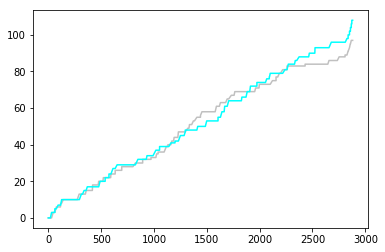

In [184]:
time = ((11 - pd.to_numeric(game['remaining_time'].str[-5:-3]))*60) + (60 - pd.to_numeric(game['remaining_time'].str[-2:])) + (pd.to_numeric(game['period']) - 1)*720
                                                                           
away = pd.to_numeric(game['away_score'])
home = pd.to_numeric(game['home_score'])
plt.plot(time,home,'silver')
plt.plot(time,away,'cyan')
plt.show()

次にショットチャートを作成します。

チームとイベントタイプ別にグルーピングしたデータを用意し、<br/>
成功：緑、失敗：赤　でベーシックなショットチャートを作成します。

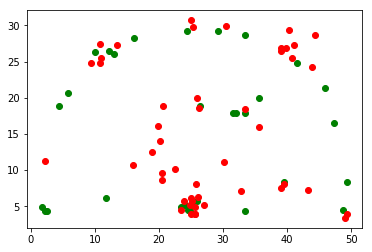

In [188]:
team = game.groupby(['team','event_type'])
team.get_group(('GSW', 'shot'))
team.get_group(('CLE', 'shot')).loc[0:,'converted_x':'converted_y']

plt.plot(team.get_group(('GSW', 'shot')).loc[0:,'converted_x'],team.get_group(('GSW', 'shot')).loc[0:,'converted_y'],'go')
plt.plot(team.get_group(('GSW', 'miss')).loc[0:,'converted_x'],team.get_group(('GSW', 'miss')).loc[0:,'converted_y'],'ro')
plt.show()


X軸の25あたりがリングですね。ミドルレンジのシュートがあまり決まっていなかったようです。